In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
from IPython.display import display

import os, random

from perceptual.filterbank import Steerable, visualize
import cv2

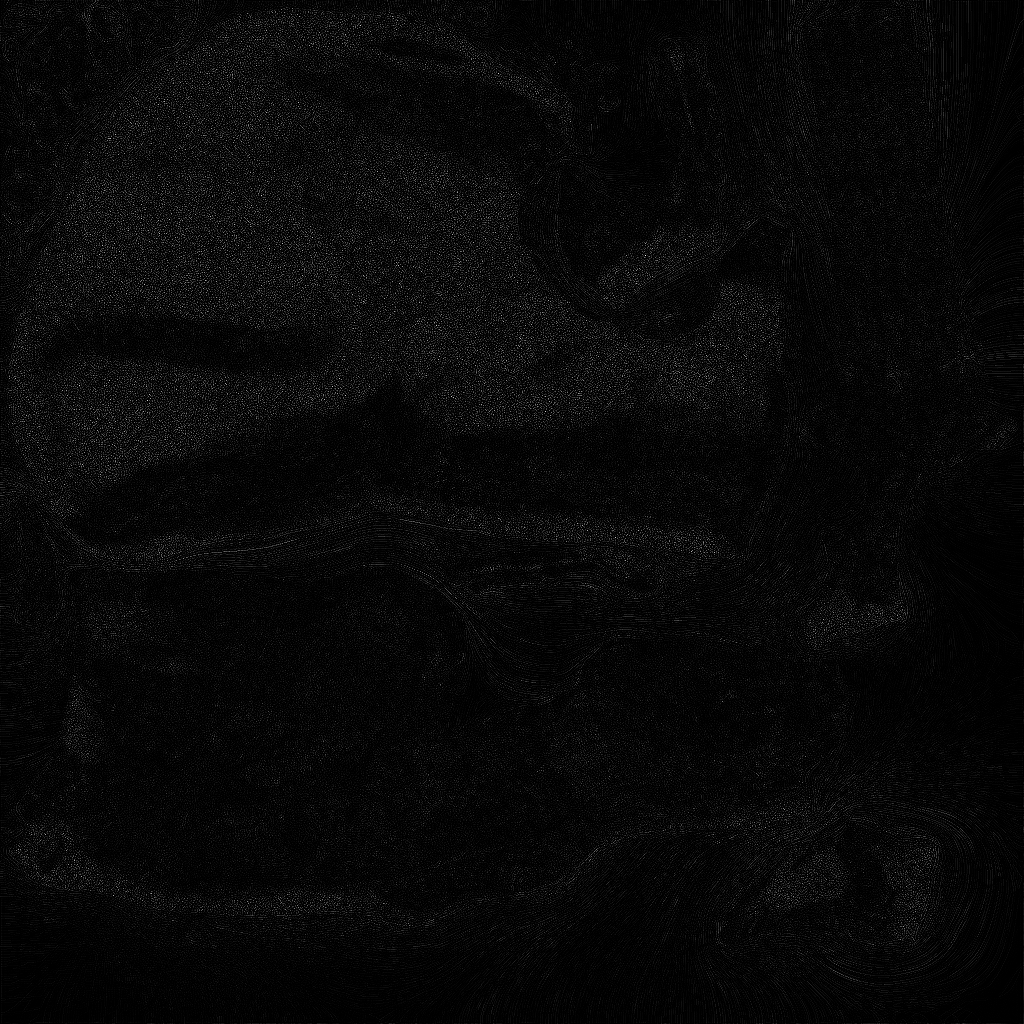

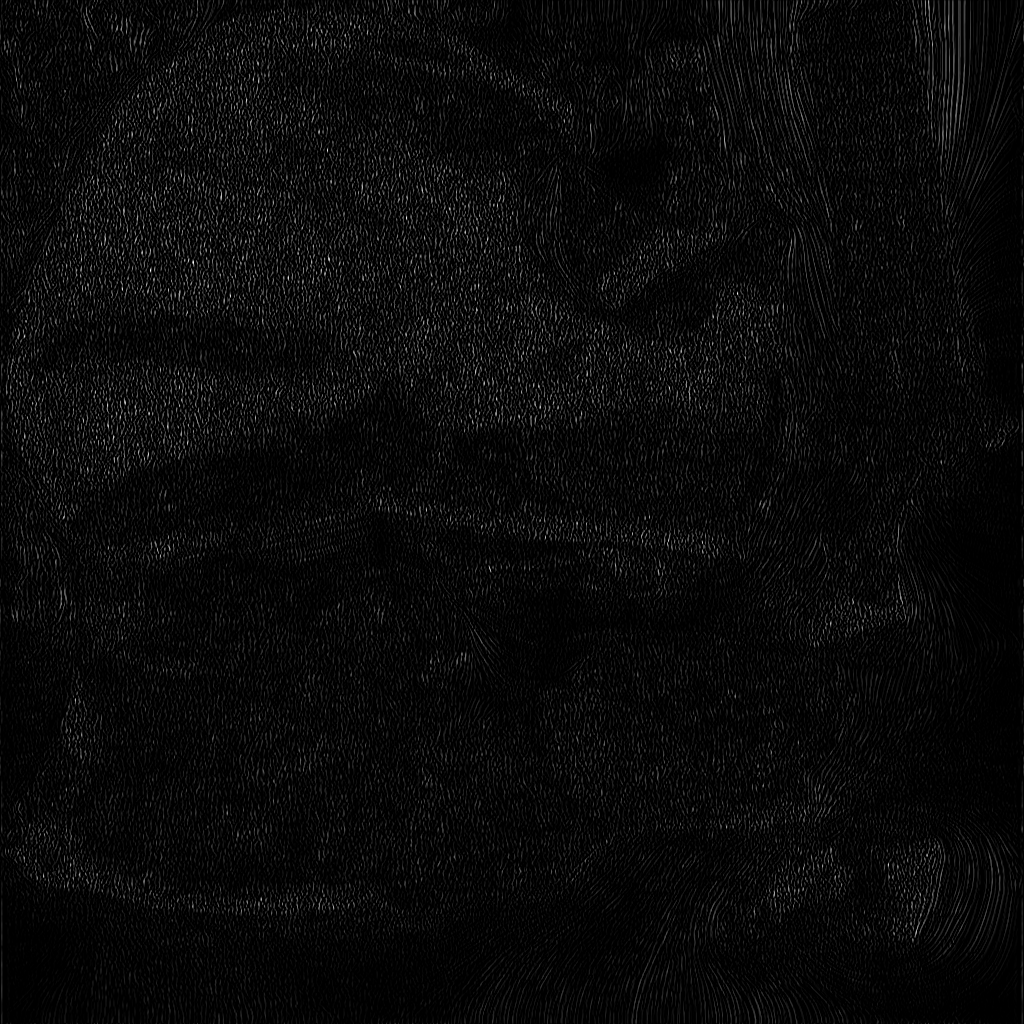

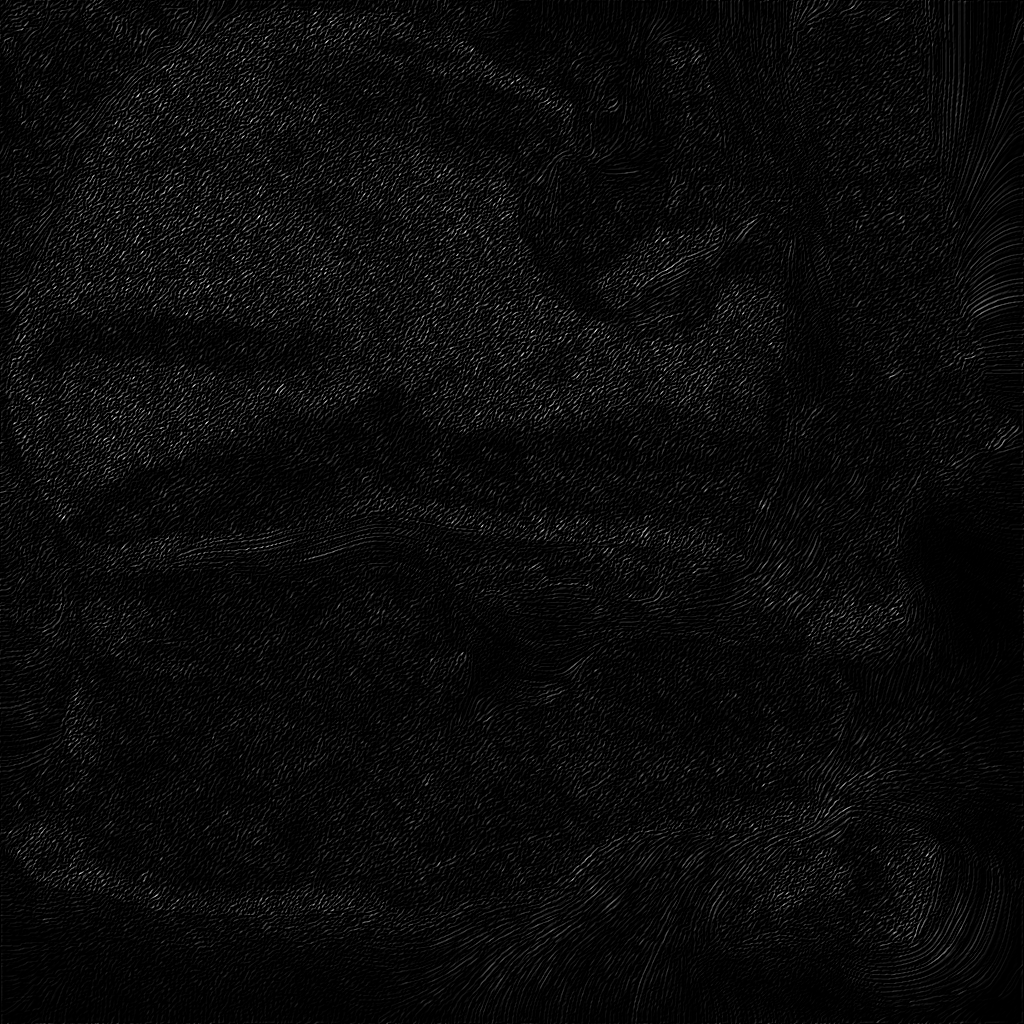

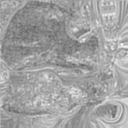

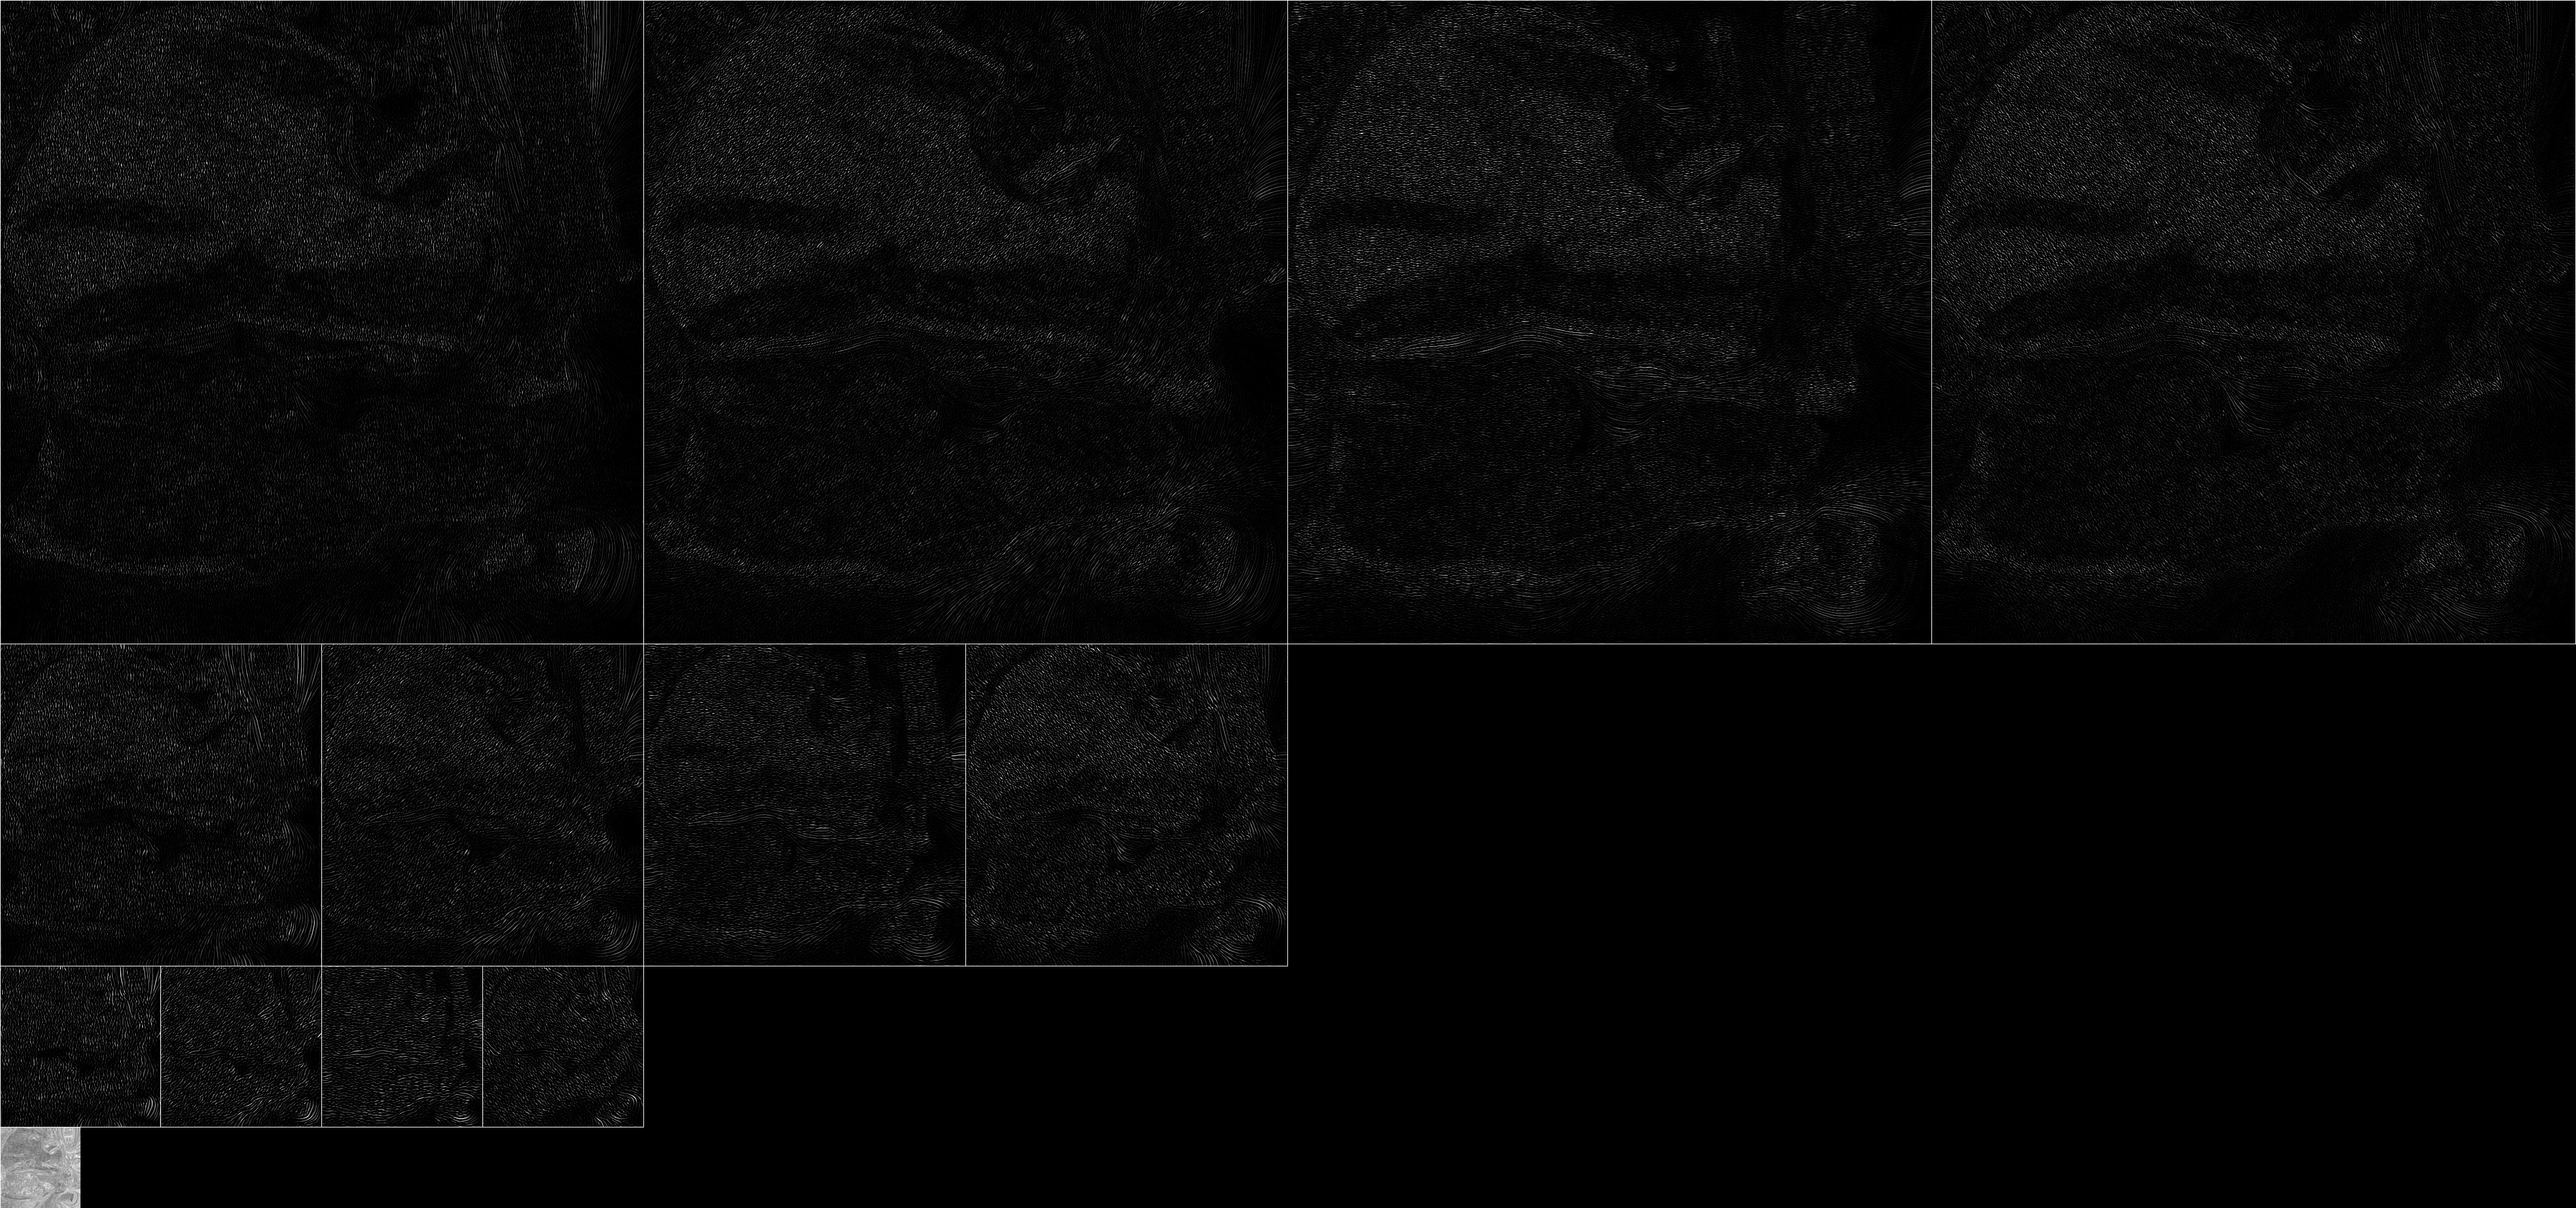

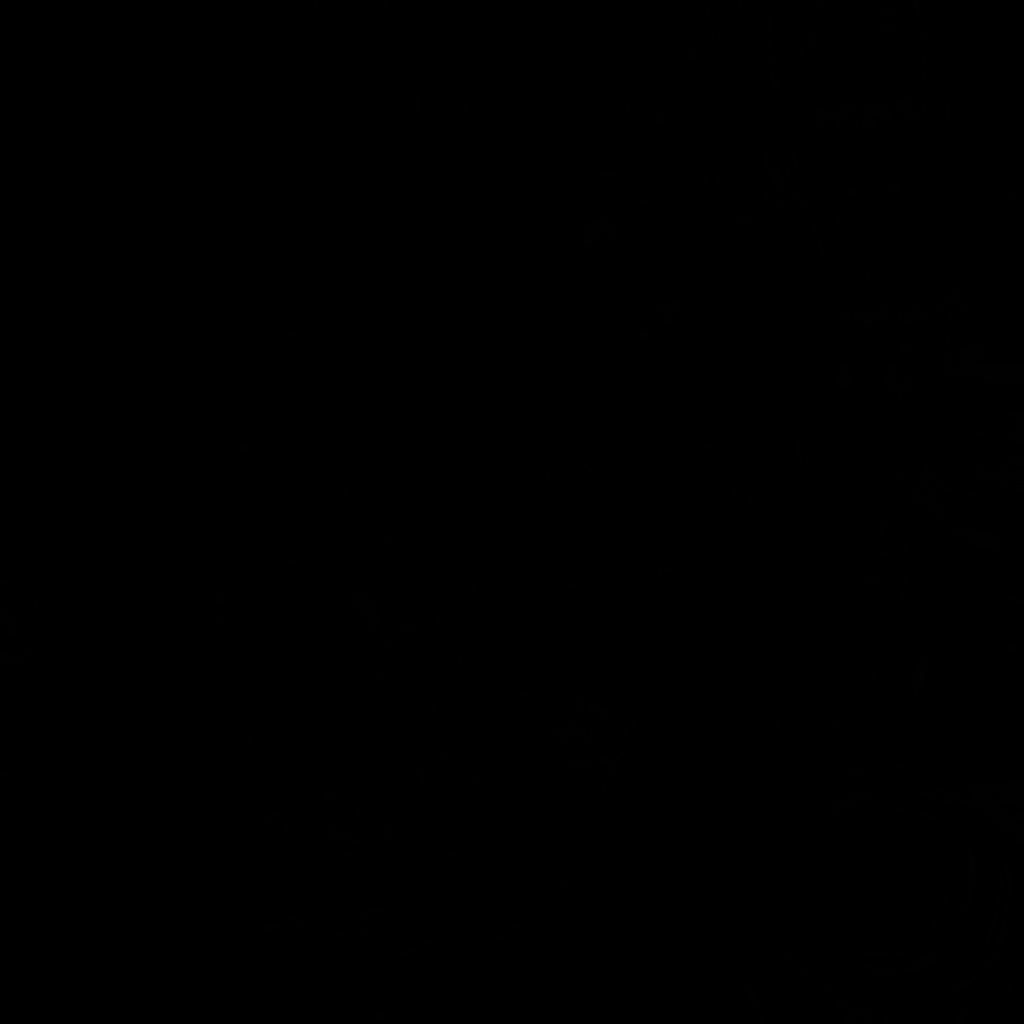

In [2]:
im = Image.open('data/Data_2017_03_31/Data/Rock/Mesh_000000/_Shared/Mesh_000000_HD_BC.tga').convert('L')

# display(im)

# Build a complex steerable pyramid 
# with height 5 (including lowpass and highpass)
s = Steerable(5)
coeff = s.buildSCFpyr(np.array(im))

# coeff is an array and subbands can be accessed as follows:
# coeff[0] : highpass
# coeff[1][0], coeff[1][1], coeff[1][2], coeff[1][3] : bandpass of scale 1
# coeff[2][0], coeff[2][1], coeff[2][2], coeff[2][3] : bandpass of scale 2
# ...
# coeff[4]: lowpass. It can also be accessed as coeff[-1]
display(Image.fromarray(coeff[0] / coeff[0].max() * 255).convert('L'))
display(Image.fromarray(coeff[1][0].real / coeff[1][0].real.max() * 255).convert('L'))
display(Image.fromarray(coeff[1][1].real / coeff[1][1].real.max() * 255).convert('L'))
display(Image.fromarray(coeff[-1] / coeff[-1].max() * 255).convert('L'))
display(Image.fromarray(visualize(coeff)).convert('L'))

# or visualization of whole decomposition
# reconstruction
out = s.reconSCFpyr(coeff)
display(Image.fromarray(out))